# HW 10 CLUSTERING BUSINESS

### Bailey Griswold
bg1672  
PUI, Fall 2016  
December 10, 2016  
Professor Bianco  

### HW 11, Assignment 2

TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)
    3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).
    4. Use another clustering algorithm (of your choice)
    5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters
    6. Compare the results of the 2 algorithms
    7. attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator. 
    

# cluster time trends in NYC businesses: 
# DATA
# Census Business data:
## download census data for businesses by ZIP code. the data is here
http://www.census.gov/econ/cbp/download/
##  you can  download it with 4 terminal commands as follows: the data from 1993 through 2001 is different in the format of its path than the data after 2001 (that is why more than one for loop is needed)



In [131]:
import numpy as np
import os
import pandas as pd
import zipfile
import geopandas as gp
import sklearn as skl
from sklearn import preprocessing
from sklearn.cluster import KMeans
import pylab as pl
import scipy.cluster as scp

%pylab inline

PUIDATA = os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Download data

#!for ((y=93; y<=99; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

#!for ((y=0; y<=1; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0$y\totals.zip; done

#!for ((y=2; y<=9; y+=1)); do wget ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

#!for ((y=10; y<=15; y+=1)); do wget ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done


NOTES: 
to read in a zip file without unzipping it you can use the pandas and zipfile packages

In [5]:
#Move data to PUIdata
path = os.getenv('PUIDATA')+'/'
!mv *.zip "{path}"

#os.system('mv *.zip $PUIDATA')

mv: cannot stat `*.zip': No such file or directory


*** read in data files, and munge data: set zipcodes to numeric, set the zipcode as the index, select only the zipcodes in NYC, rename the EST column by the year, and add each dataset to a dataframe that collects the data from all the files. ***

In [6]:
biz = pd.DataFrame()
nyc_zips = list(range(10000,10500)) + list(range(11000,11500))
for i in list(range(94,100)) + list(range(0,15)):
    if i < 10:
        set = '0' + str(i)
        year = int('20'+ set)
    else:
        set = str(i)
        if i <20:
            year = int('20'+ set)
        else:
            year = int('19' + set)
    fname = "zbp" + set + "totals.zip"
    zf = zipfile.ZipFile(path + fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df.columns = map(str.lower, df.columns)
    df['zip'] = pd.to_numeric(df['zip'], errors = 'coerce')
    df.index= df.zip
    df = df.loc[nyc_zips]
    df = df[['est']]
    df.rename(columns={"est" : year}, inplace = True)
    biz = pd.merge(biz, df, how='outer', right_index=True, left_index=True)
#constructed for loop with working group, and incorporated specific feedback from Scott.

In [7]:
biz.head(30)

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
zip,,,,,,,,,,,,,,,,,,,,,
10000,89.0,80.0,99.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,6999.0,7088.0,7075.0,7154.0,7254.0,7233.0,7317.0,7188.0,7141.0,7084.0,...,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7227.0,7235.0,7273.0,7369.0
10002,1784.0,1819.0,1919.0,2049.0,2003.0,2085.0,2277.0,2543.0,2269.0,2402.0,...,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2912.0,2954.0,2988.0,2972.0
10003,3256.0,3377.0,3417.0,3535.0,3649.0,3659.0,3683.0,3602.0,3616.0,3704.0,...,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4159.0,4214.0,4277.0,4333.0
10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,1294.0,1247.0,1253.0,1252.0,...,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1404.0,1442.0,1479.0,1554.0
10005,1076.0,1109.0,1216.0,1227.0,1270.0,1242.0,1287.0,1249.0,1244.0,1200.0,...,1214.0,1259.0,1273.0,1291.0,1274.0,1266.0,1301.0,1273.0,1296.0,1321.0
10006,1061.0,1002.0,969.0,990.0,1030.0,1059.0,1067.0,1026.0,934.0,862.0,...,870.0,874.0,863.0,845.0,828.0,843.0,834.0,850.0,852.0,855.0
10007,1307.0,1274.0,1254.0,1287.0,1282.0,1303.0,1327.0,1233.0,1620.0,1603.0,...,1311.0,1292.0,1284.0,1313.0,1277.0,1330.0,1368.0,1400.0,1424.0,1451.0
10008,22.0,23.0,23.0,30.0,28.0,24.0,27.0,24.0,56.0,20.0,...,16.0,20.0,18.0,15.0,15.0,13.0,15.0,14.0,20.0,15.0


*** Normalize timeseries data for clustering ***

In [90]:
biz_nona = biz.dropna(how='any') #drop NaN
biz_norm = skl.preprocessing.scale(biz_nona, axis=1) #array of normalized data

normd = pd.DataFrame(biz_norm) #convert array to dataframe
normd.index = biz_nona.index #add index back on
normd.columns = biz_nona.columns #add columns back on

In [9]:
normd.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
zip,,,,,,,,,,,,,,,,,,,,,
10001,-1.884610,-1.222765,-1.319439,-0.731959,0.011686,-0.144480,0.480182,-0.479120,-0.828633,-1.252511,...,0.443000,1.208955,2.205439,1.632833,0.390945,-0.084988,-0.189098,-0.129607,0.152978,0.866878
10002,-1.755856,-1.666569,-1.411464,-1.079826,-1.197175,-0.987988,-0.498185,0.180396,-0.518594,-0.179303,...,0.534993,0.545197,0.542646,0.557953,0.772242,1.019694,1.121736,1.228881,1.315617,1.274800
10003,-1.865454,-1.470082,-1.339380,-0.953811,-0.581311,-0.548636,-0.470215,-0.734885,-0.689140,-0.401596,...,0.131013,0.268250,0.725705,0.797591,0.889082,0.934828,1.085135,1.264849,1.470704,1.653687
10004,-1.550004,-1.473734,-1.397465,-1.058490,-1.033067,-0.550027,-0.033090,-0.431386,-0.380540,-0.389014,...,-0.321219,0.110974,0.610962,0.661808,0.687232,0.848245,0.899091,1.221117,1.534669,2.170247
10005,-2.888971,-2.319881,-0.474652,-0.284955,0.456585,-0.026278,0.749753,0.094438,0.008212,-0.750574,...,-0.509142,0.266889,0.508321,0.818733,0.525566,0.387605,0.991185,0.508321,0.904959,1.336087


# NYC zip codes shape file is here
## http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/resource/0c0e14e9-78e1-404e-97b0-c2fabceb3981

This website id currently down. I uploaded the geojson file in the github repo as well

In [10]:
#Download NYC census tract shape files, code from classmate
!curl -O "https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW11_fb55/nyc-zip-code-tabulation-areas-polygons.geojson"
shapefile="nyc-zip-code-tabulation-areas-polygons.geojson"
os.system("mv " + shapefile + " " + os.getenv("PUIDATA"))
shapefile = PUIDATA +"/nyc-zip-code-tabulation-areas-polygons.geojson"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  591k  100  591k    0     0  1354k      0 --:--:-- --:--:-- --:--:-- 5058k


In [11]:
shapes = gp.read_file(shapefile)
shapes.rename(columns = {'postalCode': 'zip'}, inplace=True)
shapes['zip'] = (pd.to_numeric(shapes['zip'], errors = 'coerce'))
shapes.drop(['@id', 'BLDGpostalCode', 'CTY_FIPS', 'OBJECTID', 'PO_NAME', 'STATE',
       'ST_FIPS', 'Shape_Area', 'Shape_Leng', 'borough'], axis=1, inplace=True)
shapes.index = shapes.zip

## Using K Means to Cluster

In [61]:
#clustering in 9 clusters

nc = 6
#data = np.load("MTA_Fare.npy")

#tots = data.transpose(2,0,1).reshape(data.shape[2], 
                                    # data.shape[1]*data.shape[0]).T
# remove null time series
#tots = tots[tots.std(1)>0]

km = KMeans(n_clusters=nc)

#standardizing before clustering
#vals = ((tots.T - tots.mean(1))/tots.std(1)).T

km.fit(normd)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

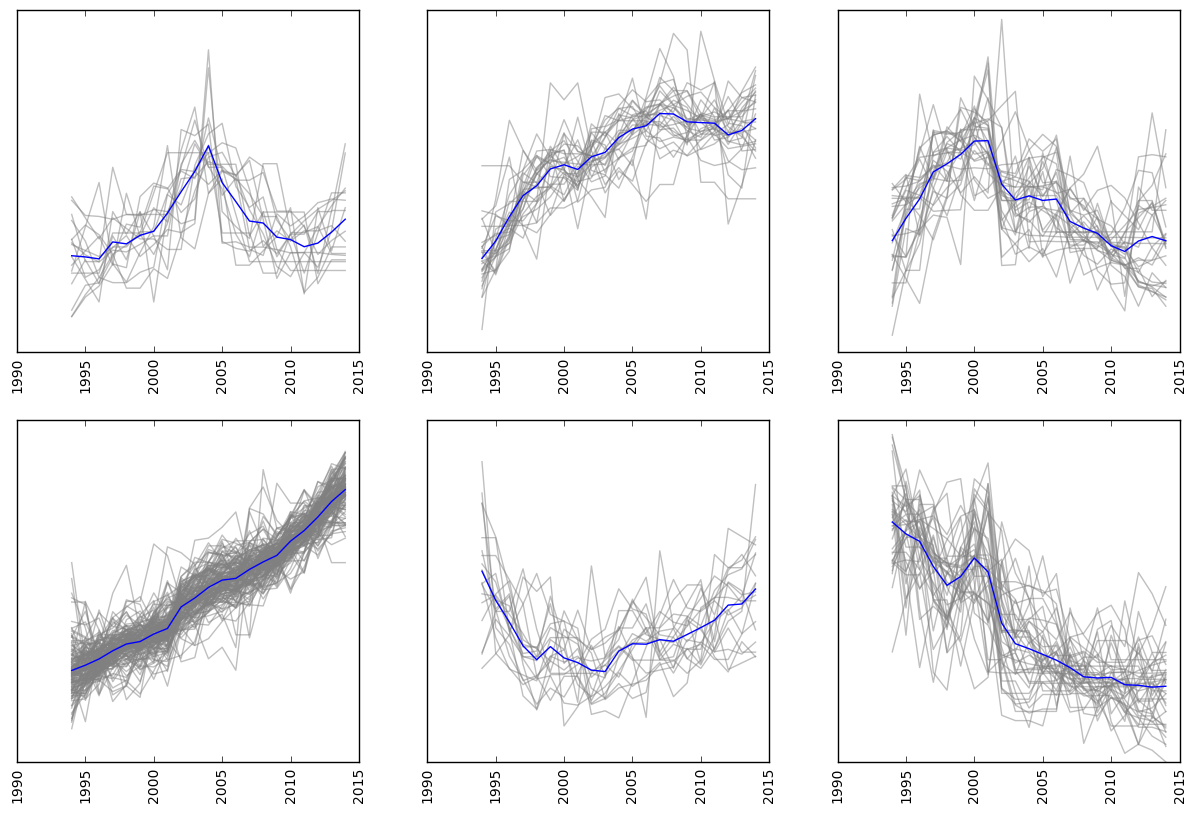

In [67]:
fig = pl.figure(figsize=(15,15))
for i,cc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(3,3,i+1)
    for j in normd.index[(km.predict(normd) == i)]:
        pl.plot(normd.loc[j], c= 'gray', alpha=.5)
    ax.plot(normd.columns, cc, c='blue')
    ax.set_yticks([])
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(10) 
        tick.label.set_rotation('vertical')

### Figure 1: Clustered Trends in Total Businesses per Zip Code, from 1994-2014 in NYC
The total number of businesses by zipcode over the period from 1994 to 2014 are grouped by similar trends.  The mean time series is plotted in blue, and the total businesses is plotted in gray. The most distinct group shows a consistant increase over the time period.   

*** Plotting clusters on map ***

In [96]:
clusters = pd.DataFrame()
clusters['cluster'] = km.predict(normd)
clusters.index = normd.index
clusters.head()

,cluster
zip,
10001,1
10002,3
10003,3
10004,3
10005,1


*** Merge business by year data to NYC shape file ***

In [98]:
nyc_est = pd.merge(shapes, clusters, how='inner', left_index=True, right_index=True)

In [99]:
len(nyc_est)

235

In [100]:
nyc_est.head(30)

,geometry,zip,cluster
zip,,,
10001,POLYGON ((-74.00827017711134 40.75258714368449...,10001,1
10002,POLYGON ((-73.97441674489379 40.73642441865476...,10002,3
10003,POLYGON ((-73.97986374196766 40.73497446573838...,10003,3
10004,"POLYGON ((-74.00596661578348 40.7043243225291,...",10004,3
10004,POLYGON ((-74.04166368343016 40.69644987183209...,10004,3
10004,"POLYGON ((-74.0241846235316 40.6839187687422, ...",10004,3
10004,POLYGON ((-74.04699098912498 40.69012472491997...,10004,3
10005,"POLYGON ((-74.00596661578348 40.7043243225291,...",10005,1
10006,POLYGON ((-74.01123100044997 40.71036688375349...,10006,5


<function matplotlib.pyplot.legend>

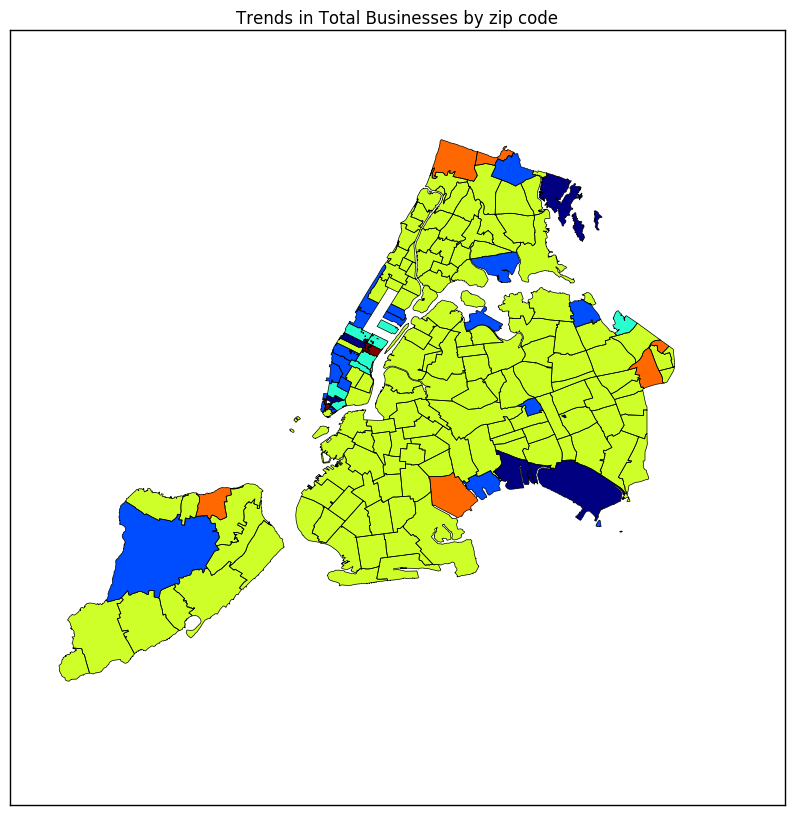

In [102]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
nyc_est.plot(column='cluster',alpha=1,linewidth=0.5,ax=ax) #colors it based on the borough
plt.title("Trends in Total Businesses by zip code")
pl.legend

## Figure 2 Changes in the Total Number of Businesses, Grouped by Trends over time
Zipcodes that showed similar changes over time in the number of businesses between 1994 and 2014 are distinguished by the same color on the graph.

*** Cluster using a second method: DB Scan ***

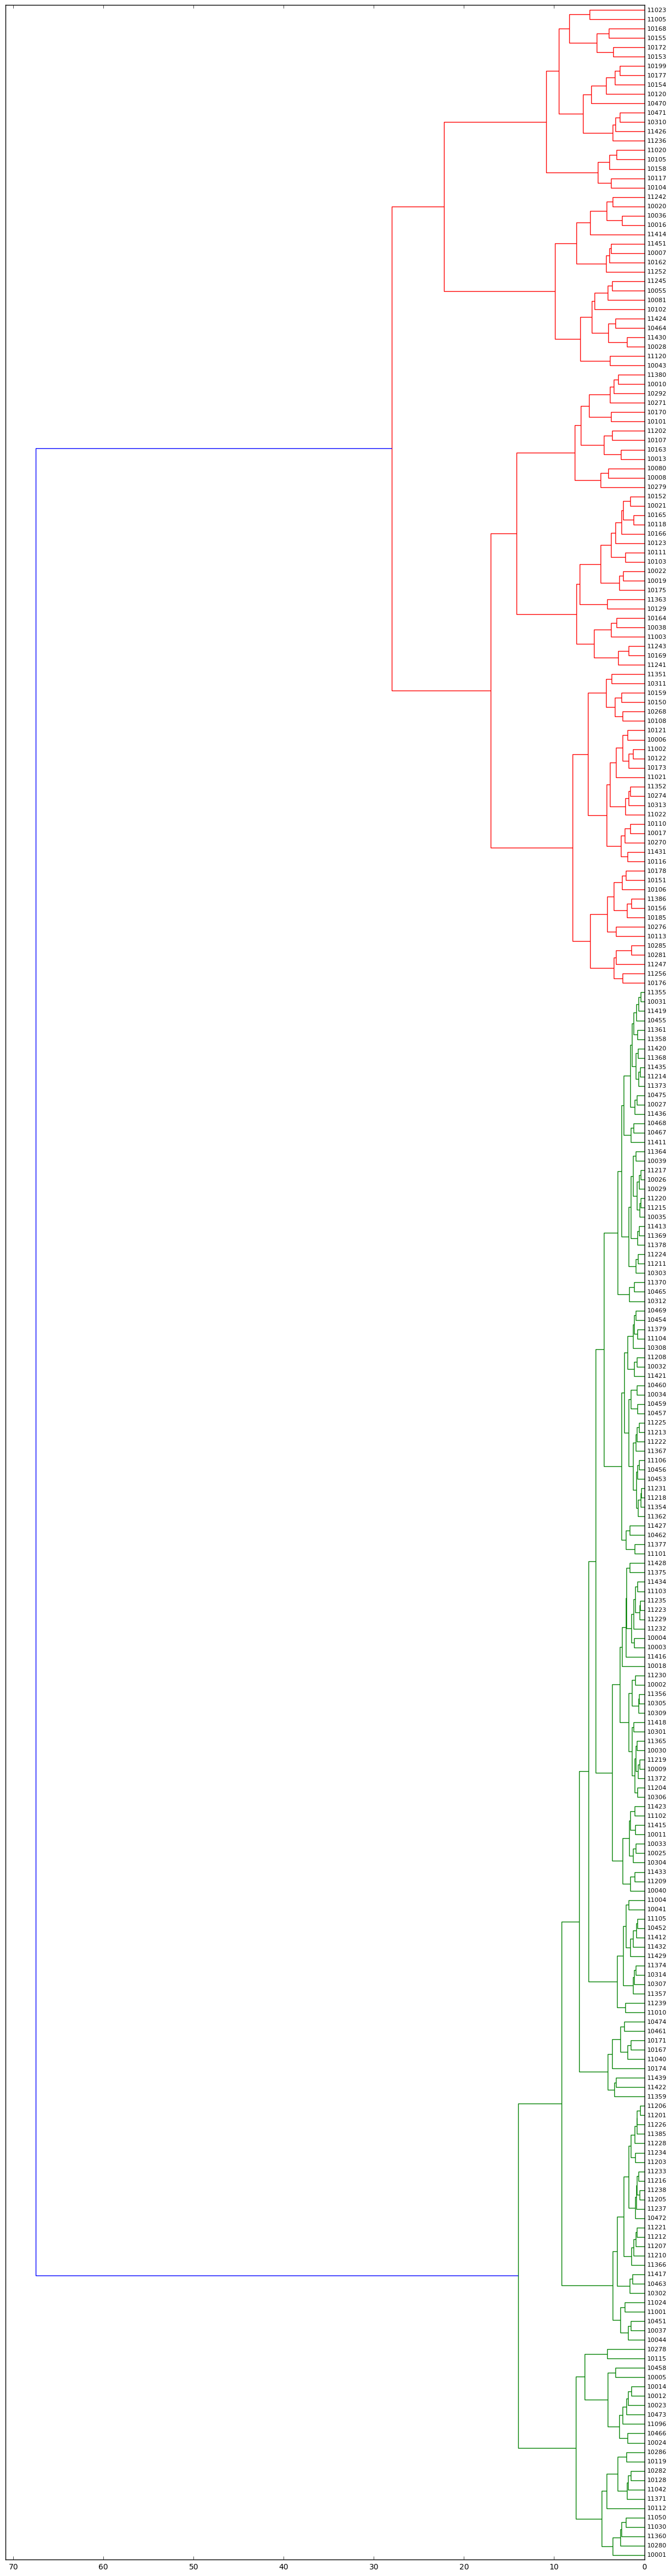

In [132]:

# Using an alternate method to cluster the time series: hierarchical clustering (creation of dendogram)

fig = pl.figure(figsize=(15, 60))
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(normd, method='ward'), labels=normd.index,
                               orientation='left', leaf_font_size=8)
## Code pulled from Sebastian's github

*** Compare the algorithms and explain the results ***

The kmeans gaphing with six clusters produced satisfying results, in so much as the graphs of each time series cluster seem to be in fact well matched.  This satisfaction is misleading, however, since a more scrupulous look at the graphs indicates a wide variation and dissimilarity within a single cluster.  The graphs of the cluster centers are interesting in that all but one has a similar pattern: a trend that becomes disrupted and changes course. For example, the mean of one cluster shows business increasing steadily, reaching a peak, then decreasing steadily.  Another shows business increasing linearly, then slowing down and leveling out.  It's possible that the trends in the number of businesses reflect the economic trends, and that the disruptions coincide with the economic recession in the late 2000s.  The hierarchal grouping produces two clusters with less overt groupings. Perhaps these can be grouped as the zipcodes that saw a steady increase in businesses, and the zip codes that did not. Many zipcodes are in the former, and are located away from downtown Manhattan.  It's likely that the growing popularity of Brooklyn, Queens, Harlem, and the Bronx also has conincided with an increase in business (with each likely impacting the other).

In [136]:
db = DBSCAN(eps=0.8, min_samples=2).fit(normd)
labels = (db.labels_).astype(int)
num_clusters = len(unique(labels)) - (1 if -1 in labels else 0)

cluster = pd.Series([normd.index[labels == i] for i in arange(num_clusters)])
print('Number of clusters: %d' % num_clusters)

Number of clusters: 2


In [137]:
cluster

0    Int64Index([10009, 10026, 10027, 10029, 10030,...
1    Int64Index([10457, 10459], dtype='int64', name...
dtype: object